a) CARREGAMENTO DOS DADOS
✓ Arquivo data_preg.mat carregado com sucesso
✓ 53 pontos carregados
  X: min=0.00, max=5.20
  Y: min=-0.85, max=1.93

b) GRÁFICO DE DISPERSÃO DOS DADOS


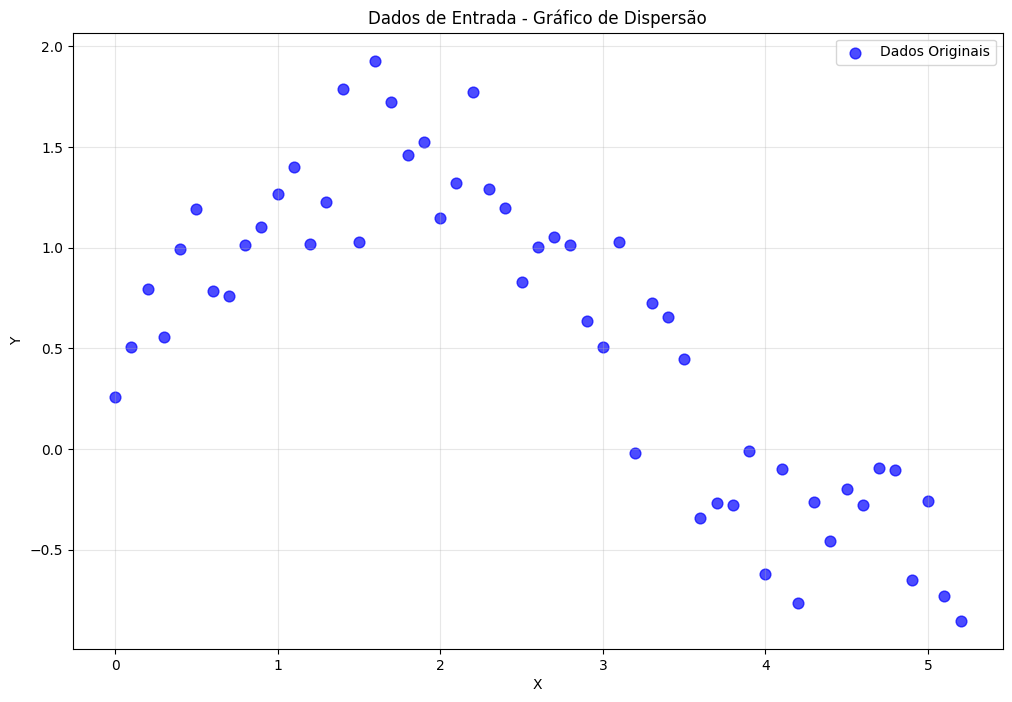


c-f) REGRESSÃO POLINOMIAL - DIFERENTES GRAUS

Grau 1: y = -0.3612x + 1.5179

Grau 2: y = -0.1706x^2 + 0.5261x + 0.7637

Grau 3: y = 0.0872x^3 - 0.8504x^2 + 1.9267x + 0.1858

Grau 8: y = -0.0044x^8 + 0.0904x^7 - 0.7595x^6 + 3.3908x^5 - 8.5662x^4 + 11.9849x^3 - 8.7404x^2 + 3.5103x + 0.2614


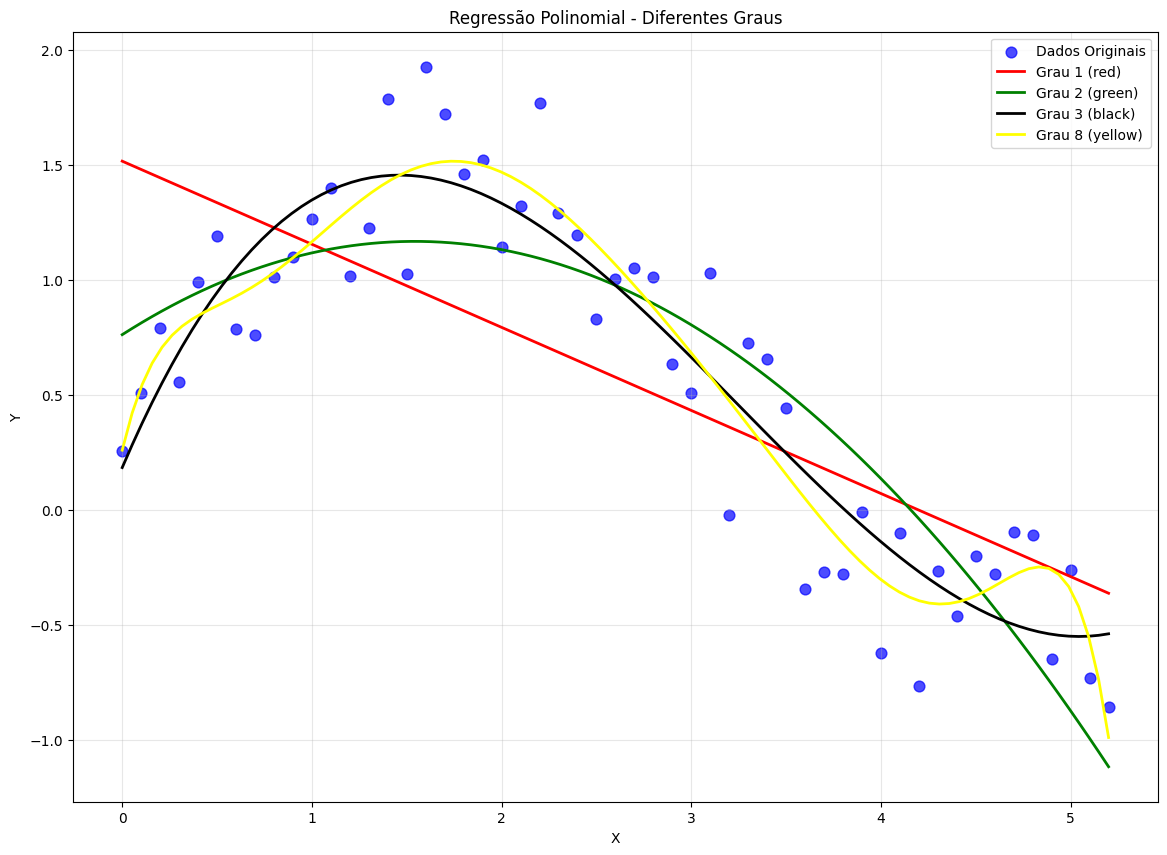


g) ERRO QUADRÁTICO MÉDIO (EQM)
Grau 1: EQM = 0.265932
Grau 2: EQM = 0.138526
Grau 3: EQM = 0.078697
Grau 8: EQM = 0.058710

✓ Modelo mais preciso (menor EQM): Grau 8

h) DIVISÃO DOS DADOS (90% TREINO, 10% TESTE)
✓ Dados de treino: 47 pontos
✓ Dados de teste: 6 pontos

i) REGRESSÃO COM DADOS DE TREINO


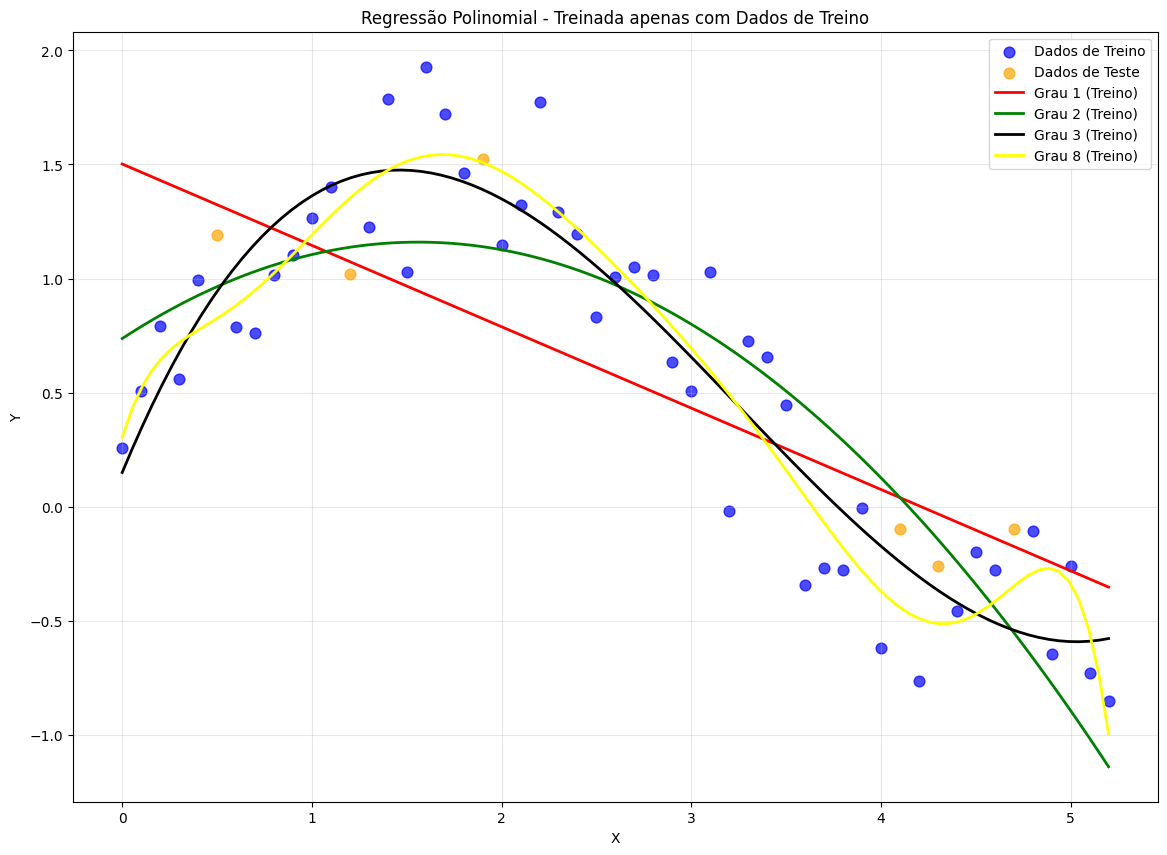


j) EQM CALCULADO COM DADOS DE TESTE
Grau 1: EQM (teste) = 0.098282
Grau 2: EQM (teste) = 0.075735
Grau 3: EQM (teste) = 0.081460
Grau 8: EQM (teste) = 0.081882

✓ Modelo mais preciso no teste (menor EQM): Grau 2

k) COEFICIENTE DE DETERMINAÇÃO (R²)
Grau   R² Treino    R² Teste     EQM Treino   EQM Teste
------------------------------------------------------------
1      0.5033       0.8083       0.287409     0.098282    
2      0.7463       0.8522       0.146778     0.075735    
3      0.8633       0.8411       0.079112     0.081460    
8      0.8996       0.8403       0.058098     0.081882    

l) ANÁLISE E CONCLUSÕES
OBSERVAÇÕES SOBRE OVERFITTING:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

1. COMPARAÇÃO R² TREINO vs TESTE:
   Grau 1: Δ = -0.3050 🟢 OK
   Grau 2: Δ = -0.1059 🟢 OK
   Grau 3: Δ = 0.0222 🟢 OK
   Grau 8: Δ = 0.0593 🟡 ATENÇÃO

2. AVALIAÇÃO COMPLETA DOS MODELOS (EQM próximo de 0 e R² próximo de 1):
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
   Gra

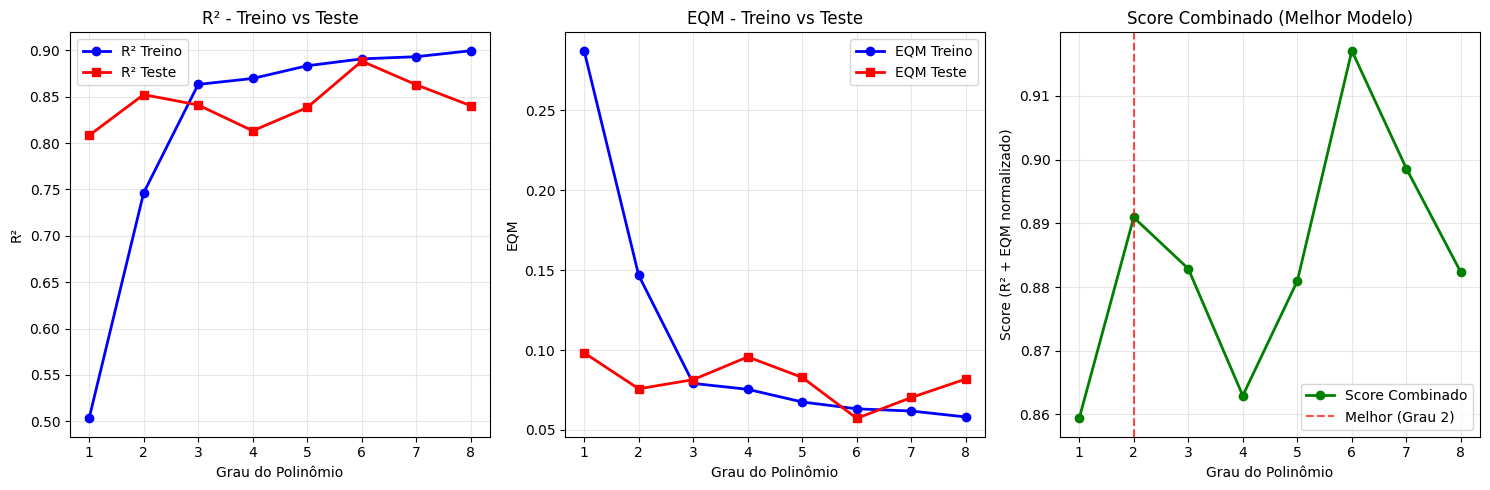


✓ Script concluído! Modelo recomendado: Grau 2
  (R² = 0.8522, EQM = 0.075735)


In [1]:
import matplotlib.pyplot as plt  # Para criação de gráficos
import numpy as np              # Para operações matemáticas e arrays
import pandas as pd             # Para manipulação de dados
from sklearn.metrics import r2_score  # Apenas R² da sklearn
from sklearn.model_selection import train_test_split     # Divisão treino/teste

# =============================================================================
# FUNÇÕES AUXILIARES
# =============================================================================

def calcular_polinomio(x, coeficientes):
    """
    Calcula y = β₀ + β₁X + β₂X² + β₃X³ + ... + βₙXⁿ
    Nota: coeficientes do polyfit vêm em ordem reversa [βₙ, βₙ₋₁, ..., β₁, β₀]
    """
    grau = len(coeficientes) - 1                    # Determina o grau do polinômio
    y = np.zeros_like(x)                           # Inicializa array y com zeros
    
    for i, coef in enumerate(coeficientes):        # Para cada coeficiente
        potencia = grau - i                        # Calcula a potência correspondente
        y += coef * (x ** potencia)                # Adiciona o termo ao polinômio
    
    return y                                       # Retorna valores calculados

def calcular_eqm(y_real, y_pred):
    """
    Calcula o Erro Quadrático Médio (EQM) manualmente
    EQM = (1/n) * Σ(y_real - y_pred)²
    """
    n = len(y_real)                                # Número de amostras
    erro_quadratico = (y_real - y_pred) ** 2       # Calcula erro quadrático
    eqm = np.sum(erro_quadratico) / n              # Média dos erros quadráticos
    return eqm                                     # Retorna EQM

def exibir_equacao(coeficientes, grau):
    """Exibe a equação do polinômio de forma legível"""
    eq = "y = "                                    # Inicia string da equação
    for i, coef in enumerate(coeficientes):        # Para cada coeficiente
        potencia = grau - i                        # Calcula potência
        
        if i > 0:                                  # Se não é o primeiro termo
            eq += " + " if coef >= 0 else " - "    # Adiciona sinal
            coef = abs(coef)                       # Usa valor absoluto
        
        if potencia == 0:                          # Termo constante
            eq += f"{coef:.4f}"
        elif potencia == 1:                        # Termo linear
            eq += f"{coef:.4f}x"
        else:                                      # Termos de potência maior
            eq += f"{coef:.4f}x^{potencia}"
    
    return eq                                      # Retorna equação formatada

def avaliar_modelo(y_real, y_pred):
    """
    Avalia modelo considerando EQM (próximo de 0) e R² (próximo de 1)
    Retorna um score combinado para comparação
    """
    eqm = calcular_eqm(y_real, y_pred)            # Calcula EQM
    r2 = r2_score(y_real, y_pred)                 # Calcula R²
    
    # Score combinado: R² alto e EQM baixo = score alto
    # Normaliza EQM para evitar que domine o score
    eqm_normalizado = 1 / (1 + eqm)               # Transforma EQM em valor entre 0 e 1
    score = (r2 + eqm_normalizado) / 2            # Média entre R² e EQM normalizado
    
    return score, eqm, r2                         # Retorna score, EQM e R²

# =============================================================================
# a) CARREGAMENTO DOS DADOS
# =============================================================================

print("a) CARREGAMENTO DOS DADOS")              # Cabeçalho da seção
print("=" * 60)

# Tentativa de carregar arquivo .mat ou .csv
try:
    import scipy.io as scipy                       # Importa scipy para arquivos .mat
    mat = scipy.loadmat('data_preg.mat')          # Carrega arquivo .mat
    data = mat['data']                            # Extrai dados
    x_data = data[:, 0]                           # Primeira coluna = x
    y_data = data[:, 1]                           # Segunda coluna = y
    print("✓ Arquivo data_preg.mat carregado com sucesso")
except:                                           # Se falhar
    try:
        data = pd.read_csv('data_preg.csv', header=None)  # Tenta carregar .csv
        x_data = data.iloc[:, 0].values           # Primeira coluna = x
        y_data = data.iloc[:, 1].values           # Segunda coluna = y
        print("✓ Arquivo data_preg.csv carregado com sucesso")
    except:                                       # Se ambos falharem
        # Gerar dados sintéticos para demonstração
        print("⚠ Arquivos não encontrados. Gerando dados sintéticos...")
        np.random.seed(42)                        # Seed para reprodutibilidade
        x_data = np.linspace(0, 4, 20)           # 20 pontos entre 0 e 4
        y_data = 0.5 * x_data**3 - 2 * x_data**2 + x_data + 1 + np.random.normal(0, 0.5, 20)  # Função cúbica + ruído

print(f"✓ {len(x_data)} pontos carregados")      # Mostra quantidade de pontos
print(f"  X: min={x_data.min():.2f}, max={x_data.max():.2f}")  # Range de X
print(f"  Y: min={y_data.min():.2f}, max={y_data.max():.2f}")  # Range de Y

# =============================================================================
# b) GRÁFICO DE DISPERSÃO
# =============================================================================

print("\nb) GRÁFICO DE DISPERSÃO DOS DADOS")    # Cabeçalho da seção
print("=" * 60)

plt.figure(figsize=(12, 8))                      # Cria figura com tamanho específico
plt.scatter(x_data, y_data, alpha=0.7, s=60, color='blue', label='Dados Originais')  # Scatter plot
plt.xlabel('X')                                  # Rótulo eixo X
plt.ylabel('Y')                                  # Rótulo eixo Y
plt.title('Dados de Entrada - Gráfico de Dispersão')  # Título do gráfico
plt.legend()                                     # Mostra legenda
plt.grid(True, alpha=0.3)                       # Adiciona grade
plt.show()                                       # Exibe gráfico

# =============================================================================
# c-f) REGRESSÃO POLINOMIAL PARA DIFERENTES GRAUS
# =============================================================================

print("\nc-f) REGRESSÃO POLINOMIAL - DIFERENTES GRAUS")  # Cabeçalho da seção
print("=" * 60)

# Definir graus e cores
graus = [1, 2, 3, 8]                            # Graus a serem testados (N=1,2,3,8)
cores = ['red', 'green', 'black', 'yellow']     # Cores correspondentes
coeficientes_dict = {}                           # Dicionário para armazenar coeficientes
x_linha = np.linspace(x_data.min(), x_data.max(), 100)  # Pontos para linha suave

plt.figure(figsize=(14, 10))                    # Nova figura
plt.scatter(x_data, y_data, alpha=0.7, s=60, color='blue', label='Dados Originais')  # Scatter dos dados

for grau, cor in zip(graus, cores):             # Para cada grau e cor
    # Usar polyfit para obter coeficientes
    coeficientes = np.polyfit(x_data, y_data, grau)  # ✓ Calcula βs usando polyfit
    coeficientes_dict[grau] = coeficientes       # Armazena coeficientes
    
    # Calcular y usando nossa função personalizada
    y_linha = calcular_polinomio(x_linha, coeficientes)  # ✓ Não usa função pronta do Python
    
    # Plotar linha de regressão
    plt.plot(x_linha, y_linha, color=cor, linewidth=2,   # Plota linha de regressão
             label=f'Grau {grau} ({cor})')
    
    # Exibir equação
    print(f"\nGrau {grau}: {exibir_equacao(coeficientes, grau)}")  # Mostra equação

plt.xlabel('X')                                  # Rótulo eixo X
plt.ylabel('Y')                                  # Rótulo eixo Y
plt.title('Regressão Polinomial - Diferentes Graus')  # Título
plt.legend()                                     # Legenda
plt.grid(True, alpha=0.3)                       # Grade
plt.show()                                       # Exibe gráfico

# =============================================================================
# g) ERRO QUADRÁTICO MÉDIO (EQM) PARA CADA GRAU
# =============================================================================

print("\ng) ERRO QUADRÁTICO MÉDIO (EQM)")       # Cabeçalho da seção
print("=" * 60)

eqm_dict = {}                                    # Dicionário para armazenar EQM
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_dict[grau]       # Pega coeficientes
    y_pred = calcular_polinomio(x_data, coeficientes)  # Calcula predições
    eqm = calcular_eqm(y_data, y_pred)           # ✓ Calcula EQM com função manual
    eqm_dict[grau] = eqm                         # Armazena EQM
    print(f"Grau {grau}: EQM = {eqm:.6f}")       # Mostra EQM

melhor_grau = min(eqm_dict, key=eqm_dict.get)   # Encontra grau com menor EQM
print(f"\n✓ Modelo mais preciso (menor EQM): Grau {melhor_grau}")

# =============================================================================
# h) DIVISÃO DOS DADOS - TREINO E TESTE
# =============================================================================

print("\nh) DIVISÃO DOS DADOS (90% TREINO, 10% TESTE)")  # Cabeçalho da seção
print("=" * 60)

X_train, X_test, y_train, y_test = train_test_split(     # ✓ Divisão 90% treino, 10% teste
    x_data, y_data, test_size=0.1, random_state=42
)

print(f"✓ Dados de treino: {len(X_train)} pontos")      # Mostra quantidade treino
print(f"✓ Dados de teste: {len(X_test)} pontos")        # Mostra quantidade teste

# =============================================================================
# i) REGRESSÃO USANDO APENAS DADOS DE TREINO
# =============================================================================

print("\ni) REGRESSÃO COM DADOS DE TREINO")     # Cabeçalho da seção
print("=" * 60)

coeficientes_treino = {}                         # Dicionário para coeficientes do treino
x_linha_treino = np.linspace(x_data.min(), x_data.max(), 100)  # Pontos para linha

plt.figure(figsize=(14, 10))                    # Nova figura
plt.scatter(X_train, y_train, alpha=0.7, s=60, color='blue', label='Dados de Treino')    # Scatter treino
plt.scatter(X_test, y_test, alpha=0.7, s=60, color='orange', label='Dados de Teste')     # Scatter teste

for grau, cor in zip(graus, cores):             # Para cada grau
    # Ajustar modelo apenas com dados de treino
    coeficientes = np.polyfit(X_train, y_train, grau)  # ✓ Usa apenas dados de treino
    coeficientes_treino[grau] = coeficientes     # Armazena coeficientes
    
    # Calcular linha de regressão
    y_linha = calcular_polinomio(x_linha_treino, coeficientes)  # Calcula linha
    
    # Plotar
    plt.plot(x_linha_treino, y_linha, color=cor, linewidth=2,   # Plota linha
             label=f'Grau {grau} (Treino)')

plt.xlabel('X')                                  # Rótulo eixo X
plt.ylabel('Y')                                  # Rótulo eixo Y
plt.title('Regressão Polinomial - Treinada apenas com Dados de Treino')  # Título
plt.legend()                                     # Legenda
plt.grid(True, alpha=0.3)                       # Grade
plt.show()                                       # Exibe gráfico

# =============================================================================
# j) EQM USANDO APENAS DADOS DE TESTE
# =============================================================================

print("\nj) EQM CALCULADO COM DADOS DE TESTE")  # Cabeçalho da seção
print("=" * 60)

eqm_teste_dict = {}                              # Dicionário para EQM do teste
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes do treino
    y_pred_teste = calcular_polinomio(X_test, coeficientes)  # ✓ Predições apenas no teste
    eqm_teste = calcular_eqm(y_test, y_pred_teste)     # ✓ EQM manual apenas no teste
    eqm_teste_dict[grau] = eqm_teste             # Armazena EQM
    print(f"Grau {grau}: EQM (teste) = {eqm_teste:.6f}")    # Mostra EQM

melhor_grau_teste = min(eqm_teste_dict, key=eqm_teste_dict.get)  # Melhor grau no teste
print(f"\n✓ Modelo mais preciso no teste (menor EQM): Grau {melhor_grau_teste}")

# =============================================================================
# k) COEFICIENTE DE DETERMINAÇÃO (R²)
# =============================================================================

print("\nk) COEFICIENTE DE DETERMINAÇÃO (R²)")  # Cabeçalho da seção
print("=" * 60)

print(f"{'Grau':<6} {'R² Treino':<12} {'R² Teste':<12} {'EQM Treino':<12} {'EQM Teste'}")  # Cabeçalho tabela
print("-" * 60)

# Dicionários para análise completa
r2_treino_dict = {}                              # R² treino
r2_teste_dict = {}                               # R² teste
eqm_treino_dict = {}                             # EQM treino

for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes
    
    # Predições
    y_pred_treino = calcular_polinomio(X_train, coeficientes)  # Predições treino
    y_pred_teste = calcular_polinomio(X_test, coeficientes)    # Predições teste
    
    # R² scores
    r2_treino = r2_score(y_train, y_pred_treino)    # ✓ R² do treino
    r2_teste = r2_score(y_test, y_pred_teste)       # ✓ R² do teste
    
    # EQM com função manual
    eqm_treino = calcular_eqm(y_train, y_pred_treino)    # EQM treino manual
    eqm_teste = calcular_eqm(y_test, y_pred_teste)       # EQM teste manual
    
    # Armazenar para análise posterior
    r2_treino_dict[grau] = r2_treino
    r2_teste_dict[grau] = r2_teste
    eqm_treino_dict[grau] = eqm_treino
    
    print(f"{grau:<6} {r2_treino:<12.4f} {r2_teste:<12.4f} {eqm_treino:<12.6f} {eqm_teste:<12.6f}")  # Mostra resultados

# =============================================================================
# l) ANÁLISE E CONCLUSÕES
# =============================================================================

print("\nl) ANÁLISE E CONCLUSÕES")              # Cabeçalho da seção
print("=" * 60)

print("OBSERVAÇÕES SOBRE OVERFITTING:")         # Análise de overfitting
print("━" * 40)

# Análise de overfitting
print("\n1. COMPARAÇÃO R² TREINO vs TESTE:")
for grau in graus:                               # Para cada grau
    r2_treino = r2_treino_dict[grau]             # R² treino
    r2_teste = r2_teste_dict[grau]               # R² teste
    
    diferenca = r2_treino - r2_teste             # Diferença entre R²
    
    if diferenca > 0.1:                          # Critério para overfitting
        status = "🔴 POSSÍVEL OVERFITTING"
    elif diferenca > 0.05:
        status = "🟡 ATENÇÃO"
    else:
        status = "🟢 OK"
    
    print(f"   Grau {grau}: Δ = {diferenca:.4f} {status}")  # Mostra análise

print("\n2. AVALIAÇÃO COMPLETA DOS MODELOS (EQM próximo de 0 e R² próximo de 1):")
print("━" * 70)

# Avaliar cada modelo considerando EQM e R² conjuntamente
scores_teste = {}                                # Scores dos modelos no teste
for grau in graus:                               # Para cada grau
    coeficientes = coeficientes_treino[grau]     # Pega coeficientes
    y_pred_teste = calcular_polinomio(X_test, coeficientes)    # Predições teste
    
    score, eqm, r2 = avaliar_modelo(y_test, y_pred_teste)     # Avalia modelo
    scores_teste[grau] = score                   # Armazena score
    
    print(f"   Grau {grau}: R²={r2:.4f} | EQM={eqm:.6f} | Score={score:.4f}")

# Encontrar melhor modelo baseado no score combinado
melhor_modelo_completo = max(scores_teste, key=scores_teste.get)

print("\n3. RANKING DOS MODELOS:")
print("━" * 30)

# Ordenar modelos por score (melhor primeiro)
ranking = sorted(scores_teste.items(), key=lambda x: x[1], reverse=True)
for i, (grau, score) in enumerate(ranking, 1):
    r2_teste = r2_teste_dict[grau]
    eqm_teste = eqm_teste_dict[grau]
    print(f"   {i}º lugar: Grau {grau} (Score: {score:.4f}, R²: {r2_teste:.4f}, EQM: {eqm_teste:.6f})")

print("\n4. CONCLUSÃO FINAL:")
print("━" * 25)
print(f"   • Melhor modelo no teste (apenas R²): Grau {max(r2_teste_dict, key=r2_teste_dict.get)}")
print(f"   • Melhor modelo no teste (apenas EQM): Grau {min(eqm_teste_dict, key=eqm_teste_dict.get)}")
print(f"   • Melhor modelo COMPLETO (EQM+R²): Grau {melhor_modelo_completo}")
print(f"\n   RECOMENDAÇÃO: Use o modelo de Grau {melhor_modelo_completo}")
print("   que equilibra R² alto (próximo de 1) e EQM baixo (próximo de 0)")

# Gráfico comparativo final
plt.figure(figsize=(15, 5))

# Subplot 1: R² Treino vs Teste
plt.subplot(1, 3, 1)
graus_plot = list(range(1, 9))
r2_treino_plot = []
r2_teste_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_tr = calcular_polinomio(X_train, coef)
    y_pred_te = calcular_polinomio(X_test, coef)
    
    r2_treino_plot.append(r2_score(y_train, y_pred_tr))
    r2_teste_plot.append(r2_score(y_test, y_pred_te))

plt.plot(graus_plot, r2_treino_plot, 'o-', color='blue', label='R² Treino', linewidth=2)
plt.plot(graus_plot, r2_teste_plot, 's-', color='red', label='R² Teste', linewidth=2)
plt.xlabel('Grau do Polinômio')
plt.ylabel('R²')
plt.title('R² - Treino vs Teste')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

# Subplot 2: EQM Treino vs Teste
plt.subplot(1, 3, 2)
eqm_treino_plot = []
eqm_teste_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_tr = calcular_polinomio(X_train, coef)
    y_pred_te = calcular_polinomio(X_test, coef)
    
    eqm_treino_plot.append(calcular_eqm(y_train, y_pred_tr))
    eqm_teste_plot.append(calcular_eqm(y_test, y_pred_te))

plt.plot(graus_plot, eqm_treino_plot, 'o-', color='blue', label='EQM Treino', linewidth=2)
plt.plot(graus_plot, eqm_teste_plot, 's-', color='red', label='EQM Teste', linewidth=2)
plt.xlabel('Grau do Polinômio')
plt.ylabel('EQM')
plt.title('EQM - Treino vs Teste')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

# Subplot 3: Score Combinado
plt.subplot(1, 3, 3)
scores_plot = []

for g in graus_plot:
    if g in graus:
        coef = coeficientes_treino[g]
    else:
        coef = np.polyfit(X_train, y_train, g)
    
    y_pred_te = calcular_polinomio(X_test, coef)
    score, _, _ = avaliar_modelo(y_test, y_pred_te)
    scores_plot.append(score)

plt.plot(graus_plot, scores_plot, 'o-', color='green', label='Score Combinado', linewidth=2)
plt.axvline(x=melhor_modelo_completo, color='red', linestyle='--', alpha=0.7, label=f'Melhor (Grau {melhor_modelo_completo})')
plt.xlabel('Grau do Polinômio')
plt.ylabel('Score (R² + EQM normalizado)')
plt.title('Score Combinado (Melhor Modelo)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(graus_plot)

plt.tight_layout()
plt.show()

print(f"\n✓ Script concluído! Modelo recomendado: Grau {melhor_modelo_completo}")
print(f"  (R² = {r2_teste_dict[melhor_modelo_completo]:.4f}, EQM = {eqm_teste_dict[melhor_modelo_completo]:.6f})")